In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import csv

# reformat data (change semi-colons to commas)
reader = csv.reader(open('./winequality-red.csv', "r"), delimiter=';')
writer = csv.writer(open('./winequality-red-reformatted.csv', 'w'), delimiter=',')
writer.writerows(reader)

# read reformatted data using Pandas
Data = pd.read_csv('./winequality-red-reformatted.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# create an array 'target' & populate it with False if element in quality 
# column is less than or equal to quality's median value; else populte with True
target = [0 if q <= np.median(Data.quality) else 1 for q in Data.quality]

# create a Pandas series from 'target' array
Data["target"] = pd.Series(target)


# The frquency of ones in the target column is much lower than the frequency of
# zeros, so it might be a good idea to oversample the training data

# create instances of minmaxscaler & logistic regression
scaler = MinMaxScaler()
reg = LogisticRegression()

# drop columns & scale data
X = Data.drop(columns = ['target', 'quality'])
X = scaler.fit_transform(X)
y = Data.target

# split the data into training and testing set with the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

# oversample the training data
sm = SMOTE(random_state = 20)
X_resamp, y_resamp = sm.fit_resample(X_train, y_train)


# rescale data
scaler.fit(X_resamp, y_resamp)

MinMaxScaler()

### First Model Build Using Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression

# fit the regression model to the resampled data and predict
reg.fit(X_resamp, y_resamp)
yhat_test = reg.predict(X_test)
yhat_train = reg.predict(X_resamp)

### Report for Model 1

MSE for testing data set is: 0.23278688524590163
MSE for training data set is: 0.18303145853193517
Training:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1049
           1       0.80      0.84      0.82      1049

    accuracy                           0.82      2098
   macro avg       0.82      0.82      0.82      2098
weighted avg       0.82      0.82      0.82      2098

Testing:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       264
           1       0.34      0.76      0.47        41

    accuracy                           0.77       305
   macro avg       0.65      0.76      0.66       305
weighted avg       0.87      0.77      0.80       305

[ 2.87504613e+00 -3.14610316e+00 -6.18589294e-02  4.73712070e-01
 -2.17227630e+00  5.28084696e-03 -3.22929007e+00 -1.83837693e+00
 -2.66050691e-01  4.08734038e+00  6.31621483e+00]


<AxesSubplot: >

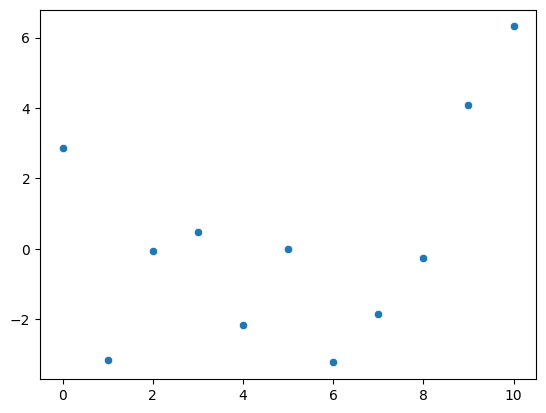

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# find the MSE values & output
MSE_test = mean_squared_error(y_test, yhat_test)
MSE_train = mean_squared_error(y_resamp, yhat_train)
print("MSE for testing data set is:", MSE_test)
print("MSE for training data set is:", MSE_train)

# classification report
print("Training:\n",classification_report(y_resamp, yhat_train))
print("Testing:\n",classification_report(y_test, yhat_test))

# coef scatterplot
reg.score(X_test, y_test)
print(reg.coef_[0])
sns.scatterplot(x = list(range(0,len(reg.coef_[0]))),y = reg.coef_[0]) 